# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Data Preprocessing

From above, we know that there is some feature who have some missing values, there are ADDRESSLINE2, STATE, POSTALCODE and TERRITORY. Because there are so many null data, so I decide to drop them.

In [ ]:
to_drop = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']

In [ ]:
df = df.drop(to_drop, axis=1)

Then, I drop some feature which is unrelevant to analyze.

In [ ]:
other_drop = ['ADDRESSLINE1','CITY','PHONE','CONTACTFIRSTNAME','CONTACTLASTNAME','PRODUCTCODE','CUSTOMERNAME','ORDERNUMBER']

In [ ]:
df = df.drop(other_drop, axis=1)

In [ ]:
# Convert data type ORDERDATE from Object to Datetime 
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  COUNTRY          2823 non-null   object        
 12  DEALSIZE         2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 286.8+ KB


In [ ]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,USA,Medium


And the dataset have been cleaned ;)

# **EXPLORATORY DATA ANALYSIS**

# Data Understanding

In [ ]:
categoricals = ['STATUS','PRODUCTLINE','COUNTRY','DEALSIZE']
numericals = ['QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','SALES','QTR_ID','MONTH_ID','YEAR_ID','MSRP']

In [ ]:
df[numericals].describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


**Observation:**
1. Minimum and maximum value is reliable and make sense.
2. SALES and MRSP are skew or not symmetrical.
3. PRICEEACH and MSRP are unskew or symmetrical.

In [ ]:
df[categoricals].describe()

,STATUS,PRODUCTLINE,COUNTRY,DEALSIZE
count,2823,2823,2823,2823
unique,6,7,19,3
top,Shipped,Classic Cars,USA,Medium
freq,2617,967,1004,1384


In [ ]:
#Count Value Function to Categoricals
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of STATUS column
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64 

Value counts of PRODUCTLINE column
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64 

Value counts of COUNTRY column
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64 

Value counts of DEALSIZE column
Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64 



**Observation:**
1. STATUS column have 6 unique values, there are Shipped, Cancelled ,Resolved, On Hold, In Process, Disputed.
2. PRODUCTLINE column have 7 unique values, there are Classic Cars, Vintage Cars, Motorcycles, Planes, Trucks and Buses, Ships, Trains.
3. COUNTRY column have 19 unique values, there are USA, Spain, France
Australia, UK, Italy, Finland, Norway, Singapore, Canada, Denmark, Germany, Sweden, Austria,Japan, Belgium, Switzerland, Philippines, Ireland.
4.  DEALSIZE column have 3 unique values, there are Small, Medium, Large.

In [ ]:
QuantityOrdered_count = df.groupby(['QUANTITYORDERED'],as_index=False).size()

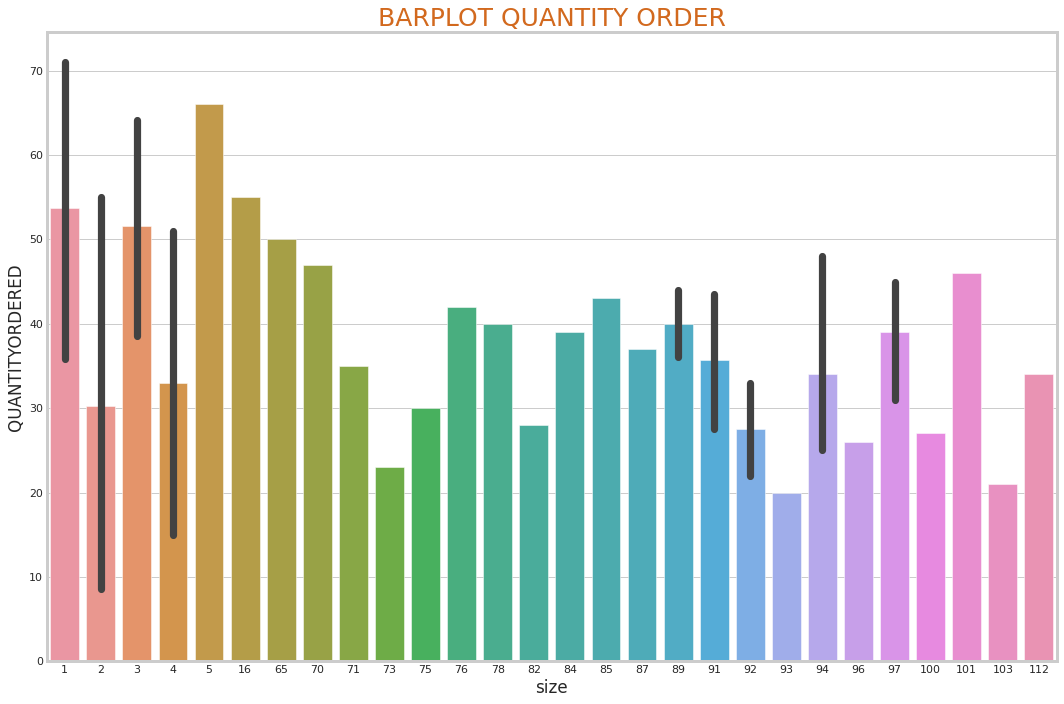

In [ ]:
plt.figure(figsize=(15,10), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=QuantityOrdered_count['size'],
            y=QuantityOrdered_count['QUANTITYORDERED'])
plt.title('BARPLOT QUANTITY ORDER', fontsize='25', color='chocolate')
plt.show()

In [ ]:
PriceEach_count = df.groupby(['PRICEEACH'],as_index=False).size()

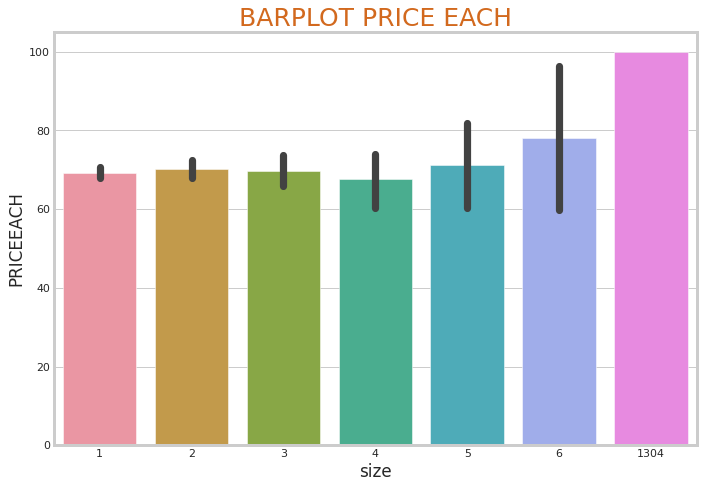

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=PriceEach_count['size'],
              y=PriceEach_count['PRICEEACH'])
plt.title('BARPLOT PRICE EACH', fontsize='25', color='chocolate')
plt.show()


In [ ]:
ORDERLINENUMBER_count = df.groupby(['ORDERLINENUMBER'],as_index=False).size()

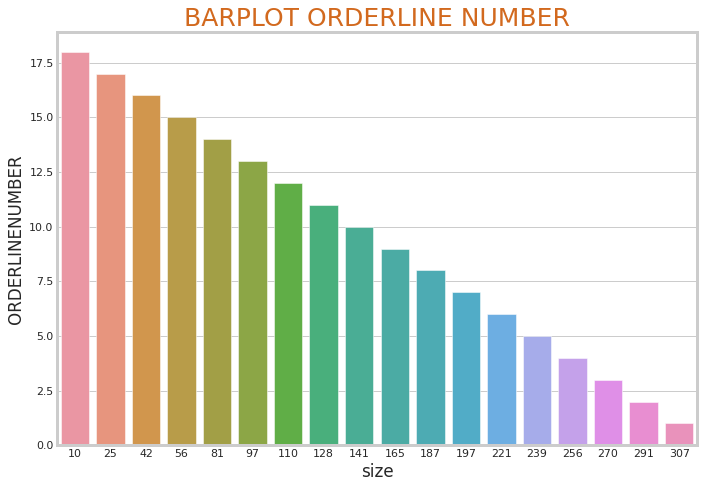

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=ORDERLINENUMBER_count['size'],
              y=ORDERLINENUMBER_count['ORDERLINENUMBER'])
plt.title('BARPLOT ORDERLINE NUMBER', fontsize='25', color='chocolate')
plt.show()

In [ ]:
SALES_count = df.groupby(['SALES'],as_index=False).size()

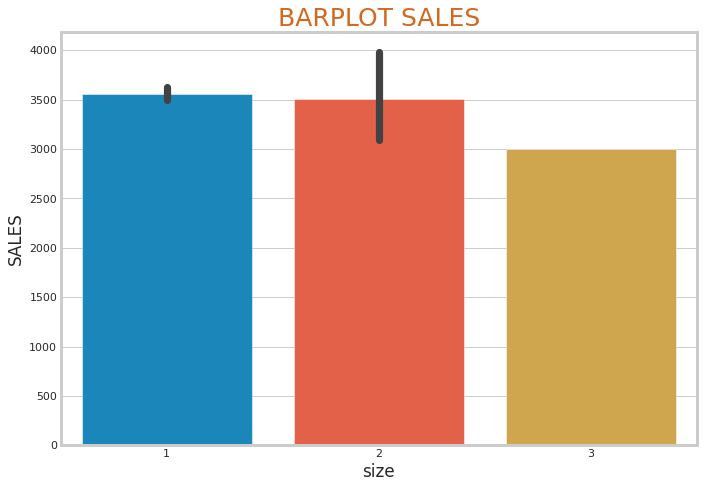

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=SALES_count['size'],
              y=SALES_count['SALES'])
plt.title('BARPLOT SALES', fontsize='25', color='chocolate')
plt.show()

In [ ]:
QTR_ID_count = df.groupby(['QTR_ID'],as_index=False).size()

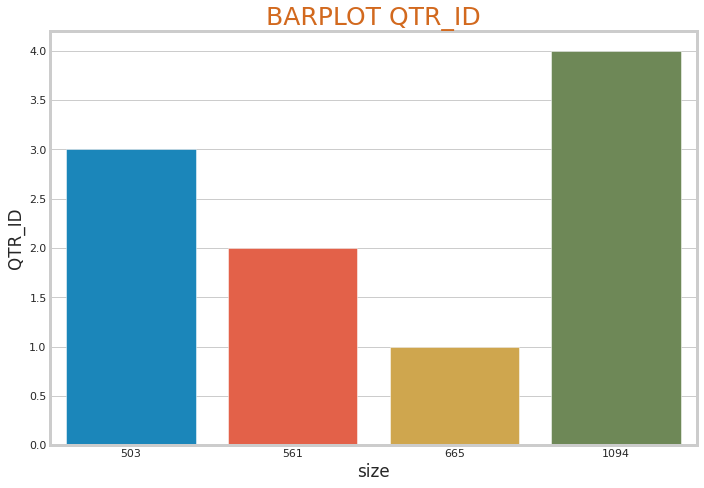

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=QTR_ID_count['size'],
              y=QTR_ID_count['QTR_ID'])
plt.title('BARPLOT QTR_ID', fontsize='25', color='chocolate')
plt.show()

In [ ]:
MONTH_ID_count = df.groupby(['MONTH_ID'],as_index=False).size()

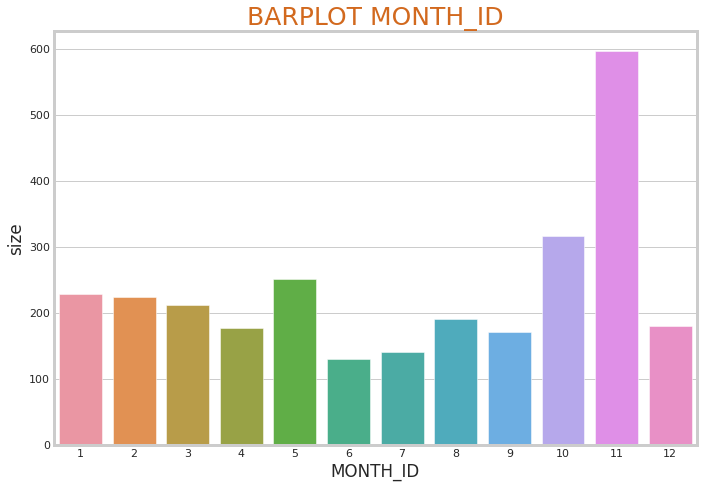

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=MONTH_ID_count['MONTH_ID'],
              y=MONTH_ID_count['size'])
plt.title('BARPLOT MONTH_ID', fontsize='25', color='chocolate')
plt.show()

In [ ]:
YEAR_ID_count = df.groupby(['YEAR_ID'],as_index=False).size()

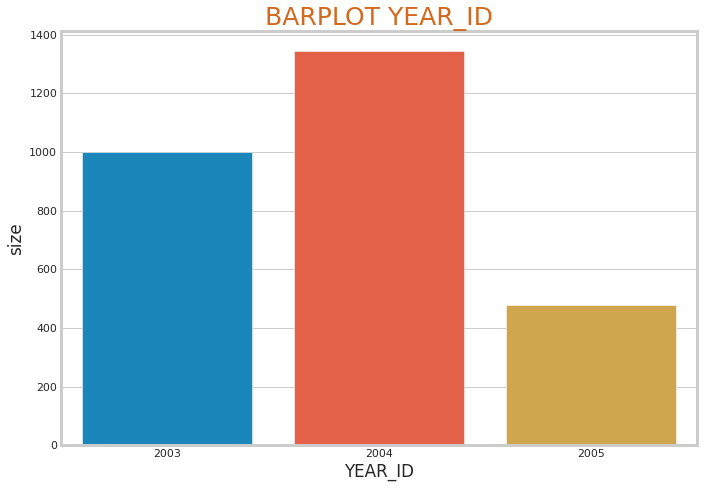

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=YEAR_ID_count['YEAR_ID'],
              y=YEAR_ID_count['size'])
plt.title('BARPLOT YEAR_ID', fontsize='25', color='chocolate')
plt.show()

In [ ]:
MSRP_count = df.groupby(['MSRP'],as_index=False).size()

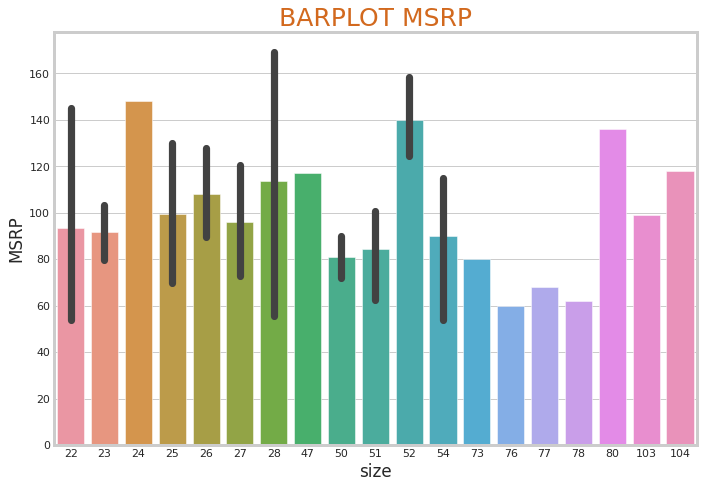

In [ ]:
plt.figure(figsize=(10,7), tight_layout=True)
sns.set_style('whitegrid')
sns.barplot(x=MSRP_count['size'],
              y=MSRP_count['MSRP'])
plt.title('BARPLOT MSRP', fontsize='25', color='chocolate')
plt.show()

# **UNIVARIATE ANALYSIS**

Detect Outliers via Boxplot

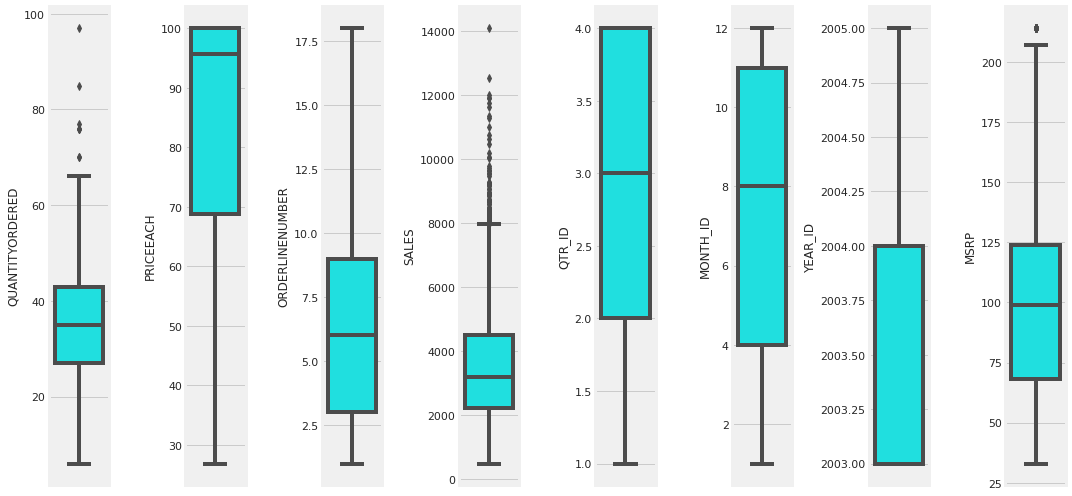

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,7))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

**Observation:**
1. QUANTITYORDERED, SALES, MSRP have outlier.
2. There is no outlier in PRICEEACH, ORDERLINENUMBER, QTR_ID, MONTH_ID, YEAR_ID.

In [ ]:
df['QUANTITYORDERED'] = np.log1p(df['QUANTITYORDERED'])
df['PRICEEACH'] = np.log1p(df['PRICEEACH'])
df['ORDERLINENUMBER'] = np.log1p(df['ORDERLINENUMBER'])
df['SALES'] = np.log1p(df['SALES'])
df['QTR_ID'] = np.log1p(df['QTR_ID'])
df['MONTH_ID'] = np.log1p(df['MONTH_ID'])
df['YEAR_ID'] = np.log1p(df['YEAR_ID'])
df['MSRP'] = np.log1p(df['MSRP'])

In [ ]:
len(df)

2823

In [ ]:
Q1 = df['C'].quantile(0.25)
Q3 = df['C'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['C'] >= low_limit) & (df['C'] <= high_limit))
df = df[filtered_entries]

Q1 = df['F'].quantile(0.25)
Q3 = df['F'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['F'] >= low_limit) & (f['F'] <= high_limit))
df = df[filtered_entries]

KeyError: ignored

**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

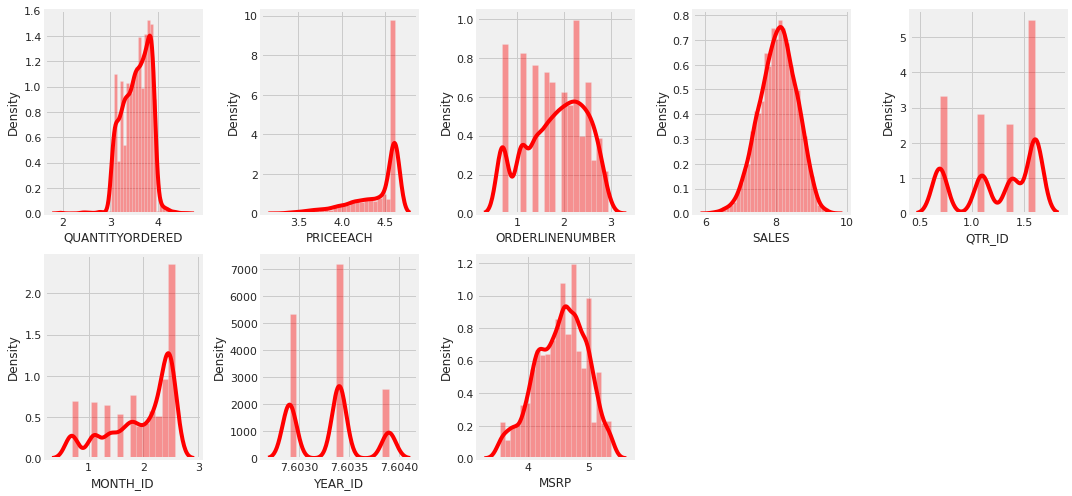

In [ ]:
plt.figure(figsize=(15,7))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observation:**
1. QUANTITYORDERED, QTR_ID, MONTH_ID, YEAR_ID, MSRP are bimodal distribution.
2. PRICEACH is negative skew.
3. ORDERLINENUMBER and SALES is positive skew. 

# **BIVARIATE/MULTIVARIATE ANALYSIS**

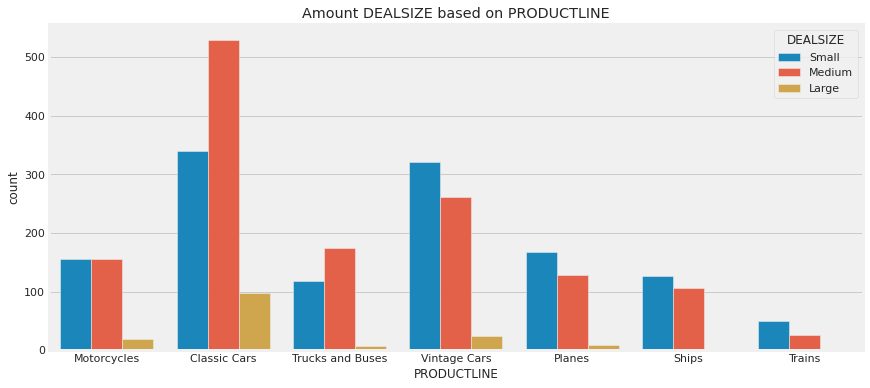

In [ ]:
# Amount DEALSIZE based on PRODUCTLINE #
plt.figure(figsize=(13,6))
plt.title ('Amount DEALSIZE based on PRODUCTLINE')
sns.countplot(data=df, x='PRODUCTLINE',
               hue='DEALSIZE')

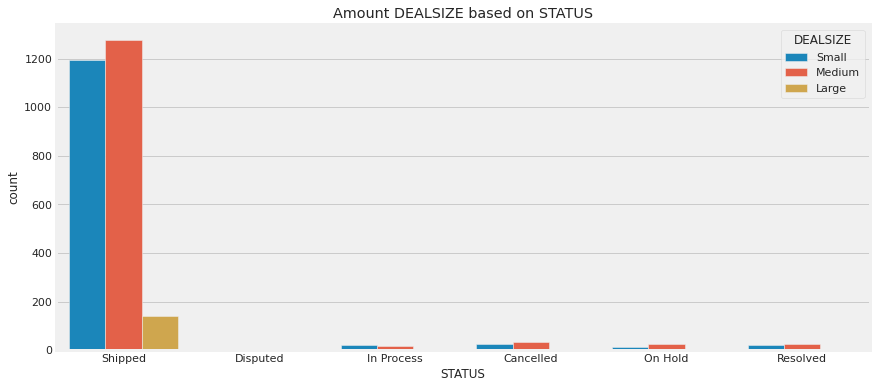

In [ ]:
# Amount DEALSIZE based on STATUS #
plt.figure(figsize=(13,6))
plt.title ('Amount DEALSIZE based on STATUS')
sns.countplot(data=df, x='STATUS',
               hue='DEALSIZE')

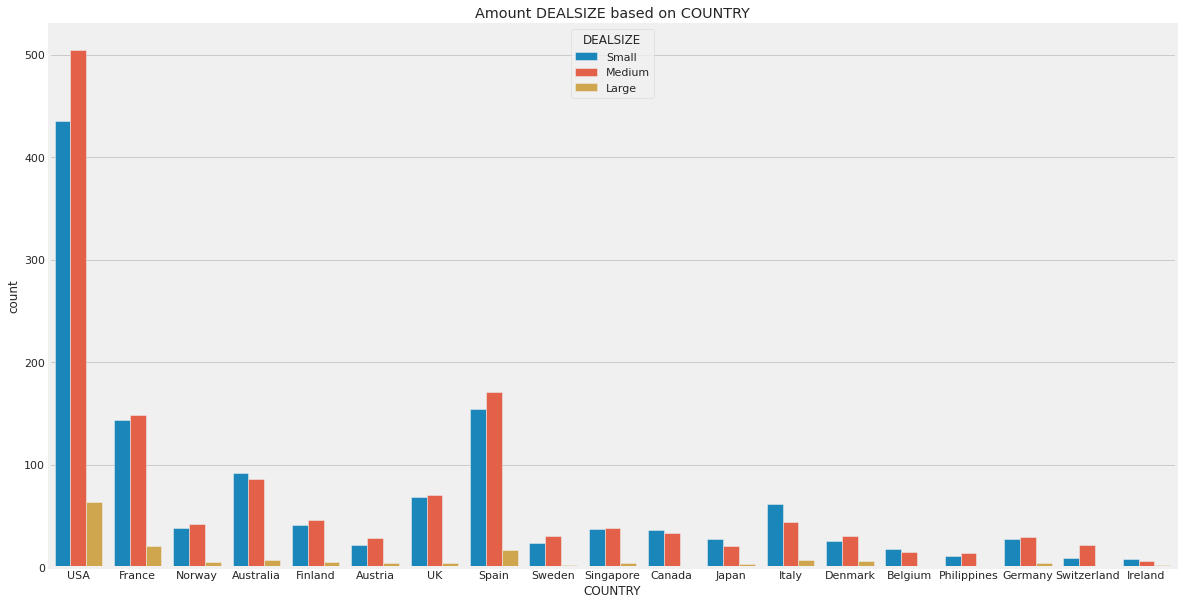

In [ ]:
# Amount DEALSIZE based on COUNTRY #
plt.figure(figsize=(18,10))
plt.title ('Amount DEALSIZE based on COUNTRY')
sns.countplot(data=df, x='COUNTRY',
               hue='DEALSIZE')

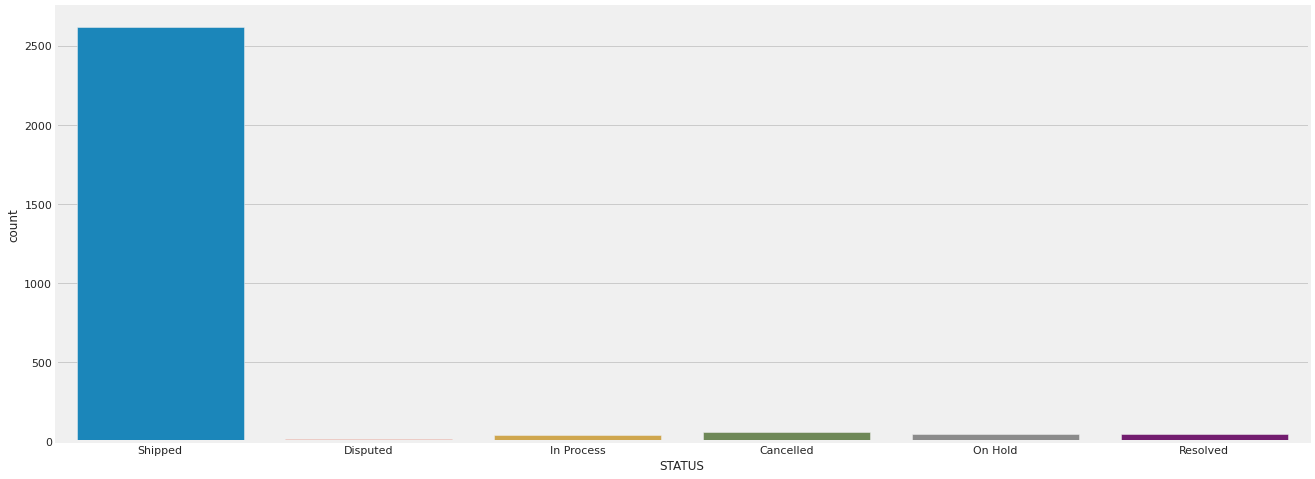

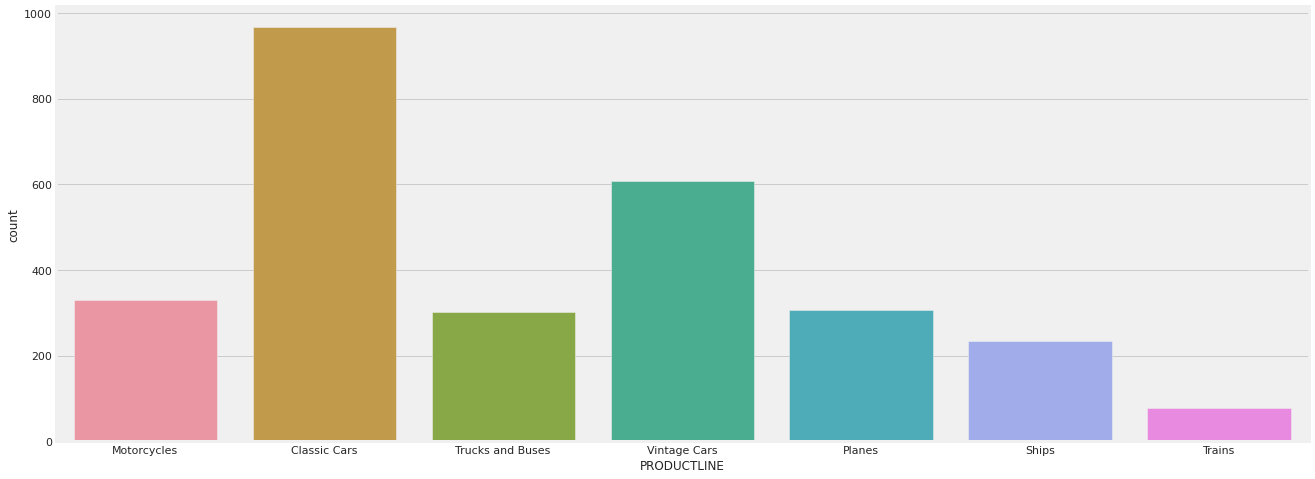

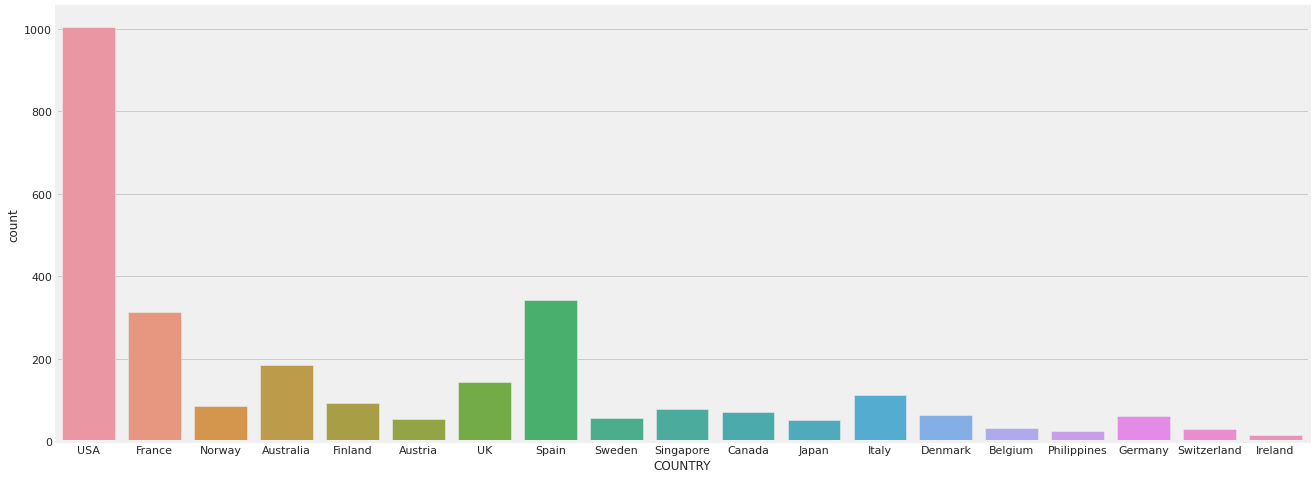

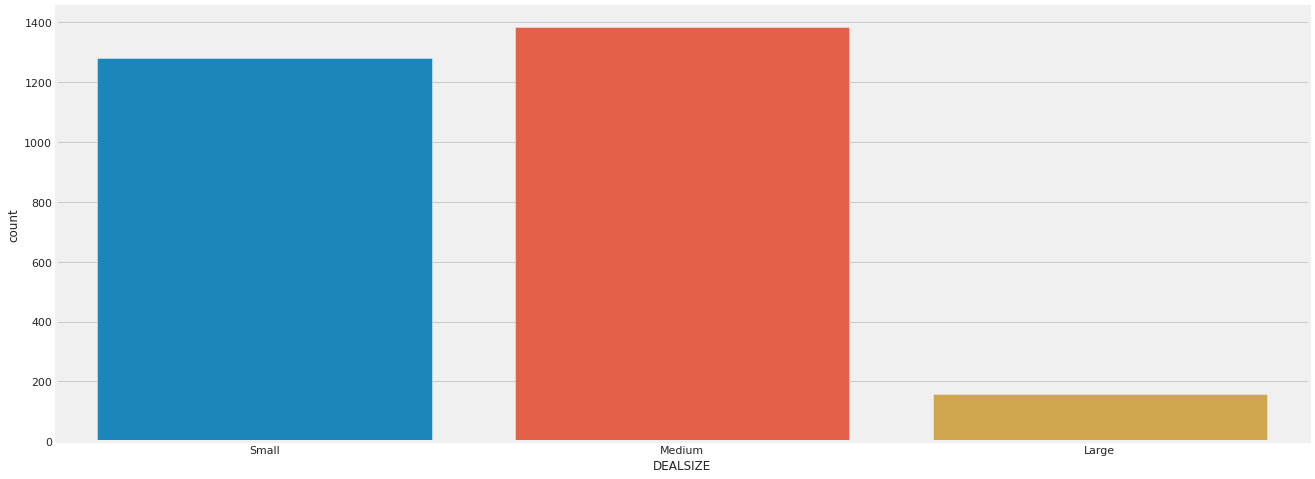

In [ ]:
for col in categoricals:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[col])
    plt.show()

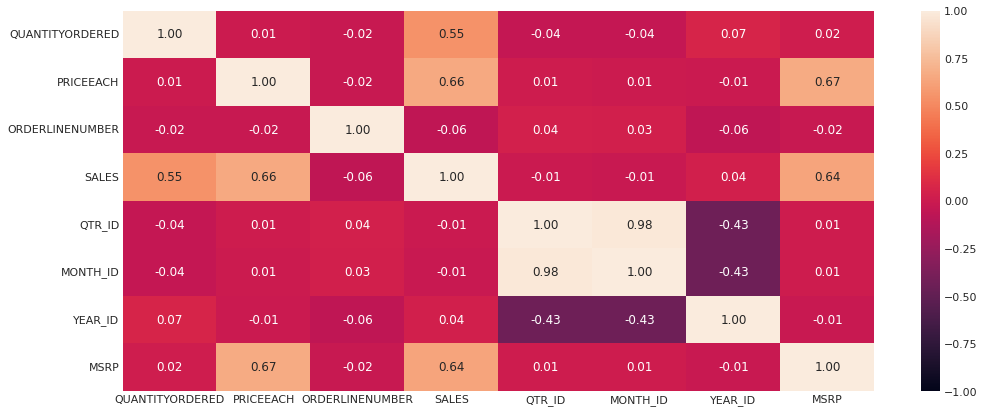

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df[numericals].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

**Insight:**

From the heatmap correlation above, it show that MONTH_ID and QTR_ID is highly correlated (>0.83). So one of them will choose to modelling process.

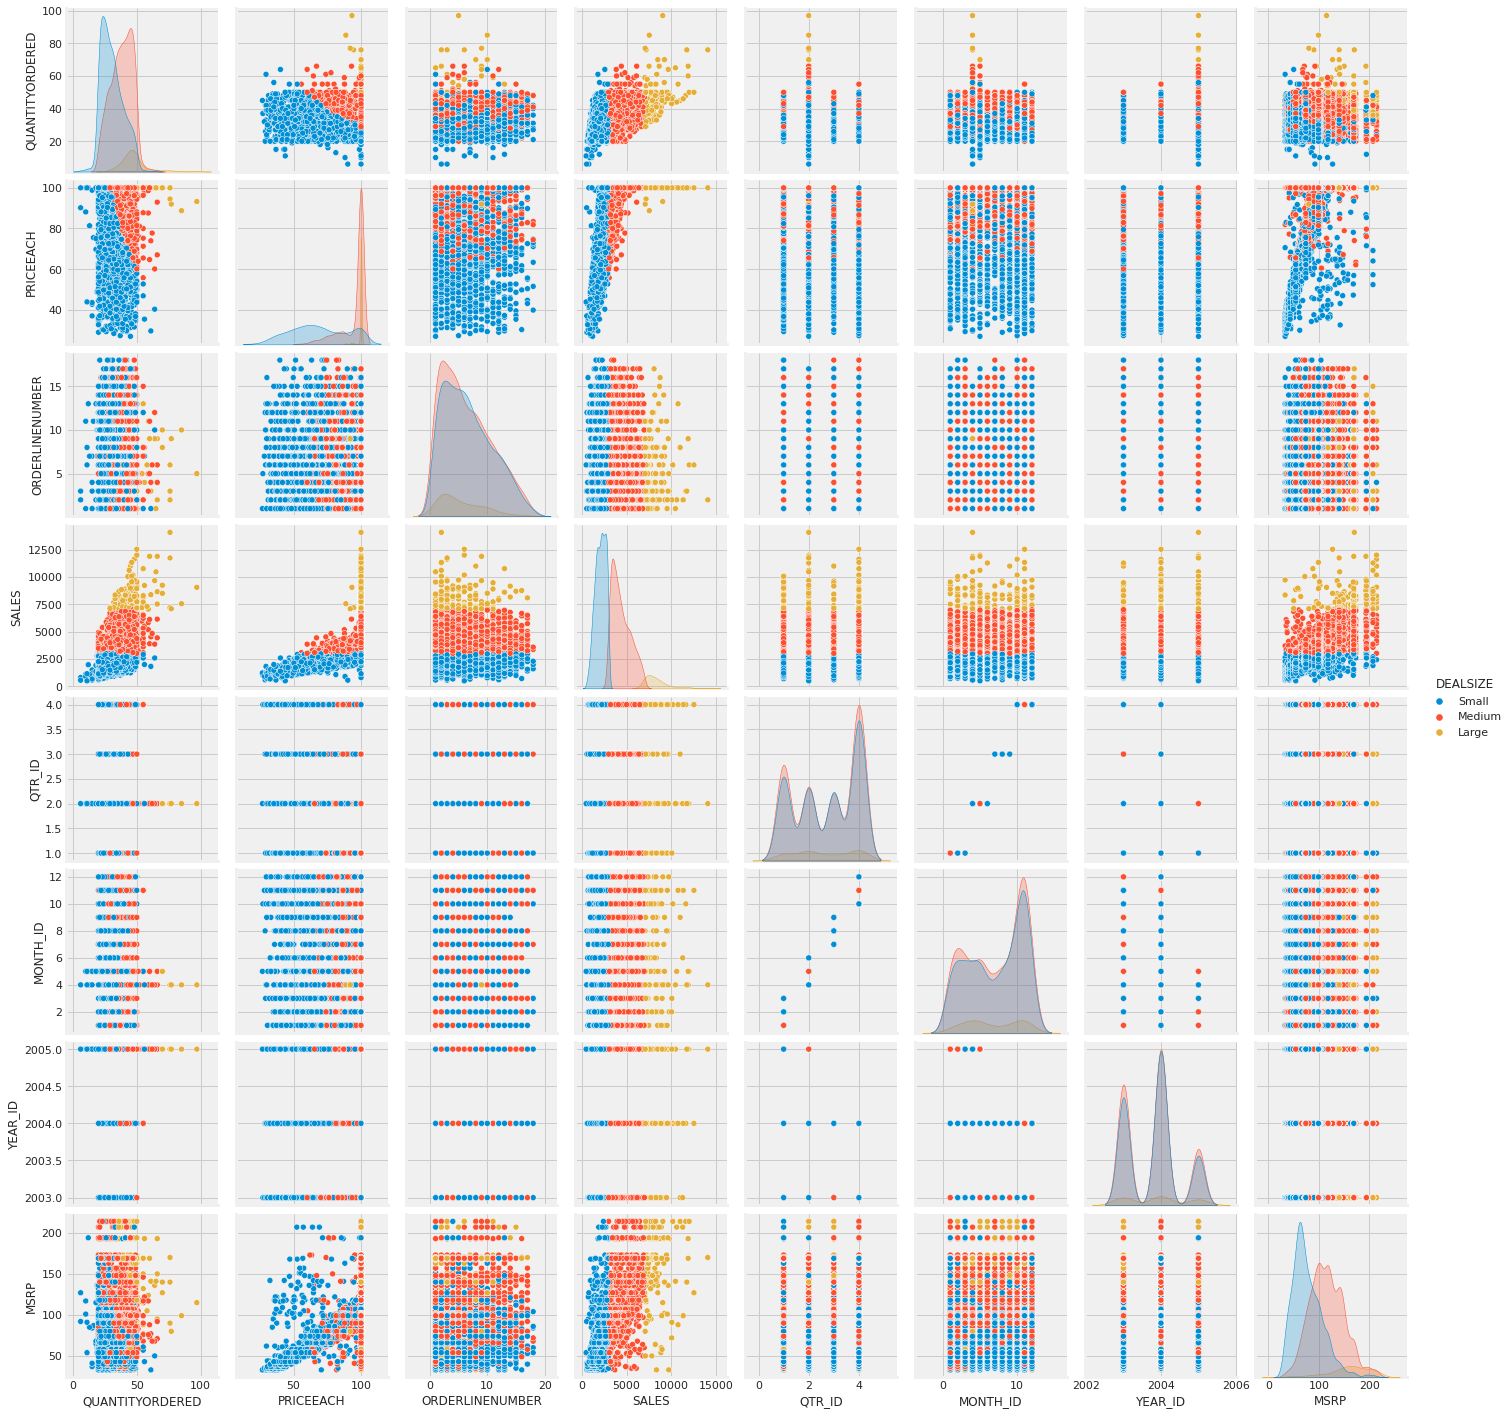

In [ ]:
# pairplot of the data
sns.pairplot(df, hue='DEALSIZE')

# **DEEP-DIVE EXLORATORY DATA ANALYSIS**

In [ ]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,USA,Medium


In [ ]:
# Top 10 Sales
top10_sales = (df
            .groupby('PRODUCTLINE')
            .agg(num_trx=('SALES','count'))
            .reset_index()
            .sort_values('PRODUCTLINE',ascending=True)
            .head(10)
            )
top10_sales

,PRODUCTLINE,num_trx
0,Classic Cars,967
1,Motorcycles,331
2,Planes,306
3,Ships,234
4,Trains,77
5,Trucks and Buses,301
6,Vintage Cars,607


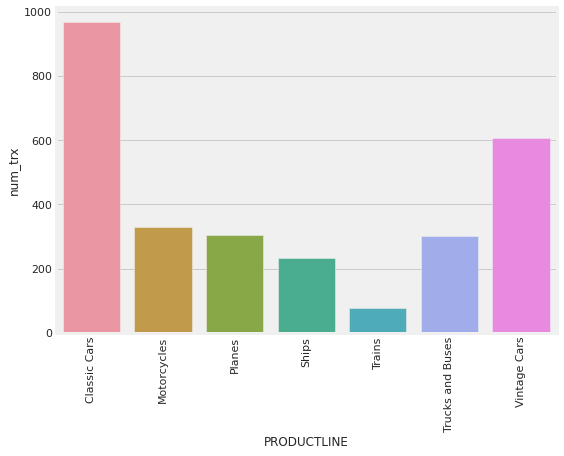

In [ ]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=top10_sales, x='PRODUCTLINE', y='num_trx')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# create total_price column
df['total_price'] = df['QUANTITYORDERED'] * df['ORDERLINENUMBER']

# group by aggregation
top10_country = (df
            .groupby('COUNTRY')
            .agg(total_spend=('total_price','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_country

,COUNTRY,total_spend
18,USA,226527
14,Spain,78528
6,France,70154
0,Australia,39518
17,UK,35999
9,Italy,29799
5,Finland,20337
13,Singapore,19220
11,Norway,18549
4,Denmark,14015


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

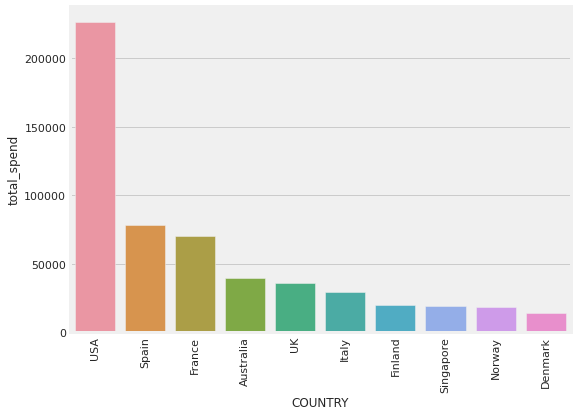

In [ ]:
# visualize it
plt.figure(figsize=(8,6))
top10_country['COUNTRY'] = top10_country['COUNTRY'].astype(str)
sns.barplot(data=top10_country, x='COUNTRY', y='total_spend')
plt.xticks(rotation=90)

In [ ]:
prod = (df[['PRODUCTLINE','ORDERLINENUMBER']]
        .drop_duplicates(subset='PRODUCTLINE',ignore_index=True))
prod.head()

,PRODUCTLINE,ORDERLINENUMBER
0,Motorcycles,2
1,Classic Cars,11
2,Trucks and Buses,8
3,Vintage Cars,2
4,Planes,12


In [ ]:
# derive InvoiceMonth column
df['ORDERMONTH'] = df['ORDERDATE'].dt.to_period('M')
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,total_price,ORDERMONTH
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,USA,Small,60,2003-02
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,France,Small,170,2003-05
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,France,Medium,82,2003-07
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,USA,Medium,270,2003-08
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,USA,Medium,686,2003-10


In [ ]:
# monthly_data
monthly_data = (df
                .groupby('ORDERMONTH')
                .agg(num_buyer=('COUNTRY','nunique'),
                     total_omzet=('SALES','sum'))
                .reset_index())

monthly_data['ORDERMONTH'] = monthly_data['ORDERMONTH'].astype(str) 
monthly_data

,ORDERMONTH,num_buyer,total_omzet
0,2003-01,4,129753.60
1,2003-02,3,140836.19
2,2003-03,4,174504.90
3,2003-04,7,201609.55
4,2003-05,4,192673.11
5,2003-06,3,168082.56
6,2003-07,3,187731.88
7,2003-08,3,197809.30
8,2003-09,5,263973.36
9,2003-10,10,568290.97


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

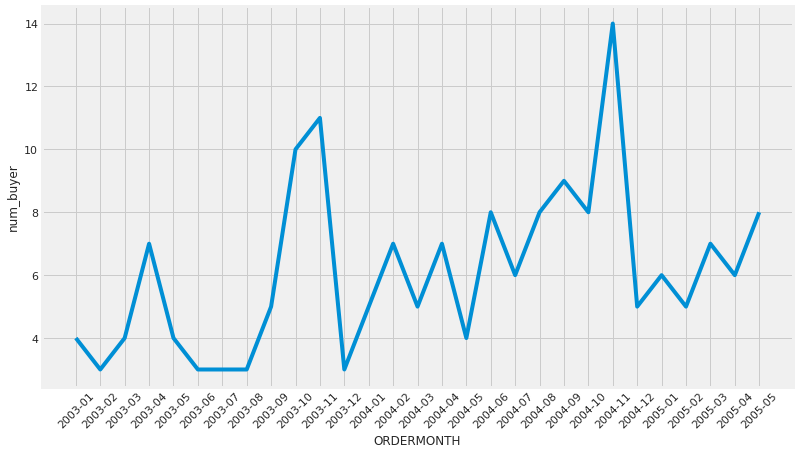

In [ ]:
# num buyer progression
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_data,
             x='ORDERMONTH',
             y='num_buyer')
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

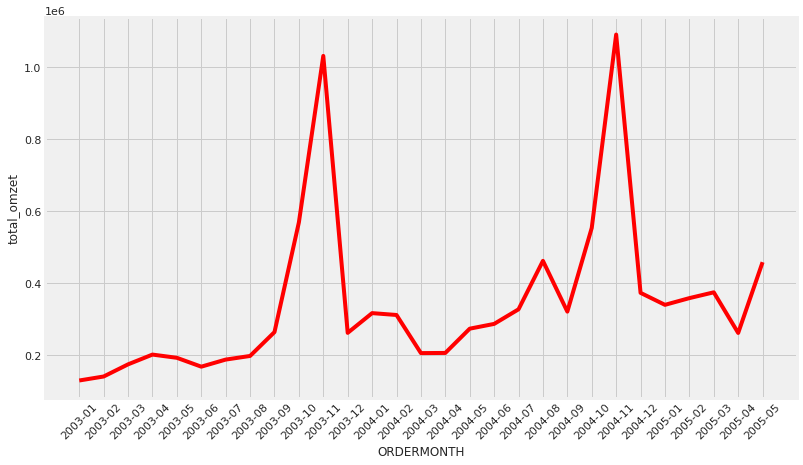

In [ ]:
# omzet progression
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_data,
             x='ORDERMONTH',
             y='total_omzet',
             color='red')
plt.xticks(rotation=45)